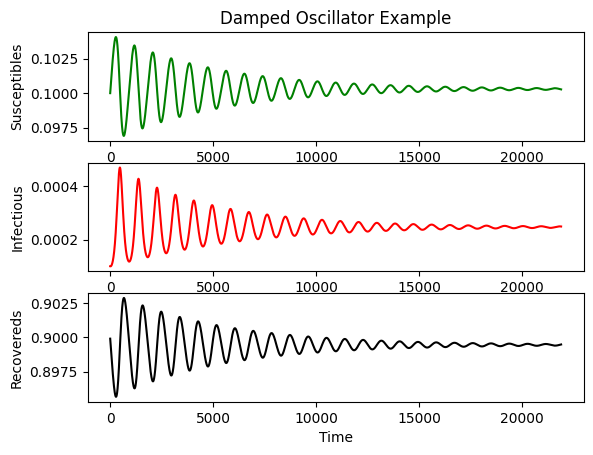

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

mu = 1 / (70 * 365.0)
beta = 520 / 365.0
gamma = 1 / 7.0
TS = 1.0
ND = 60 * 365
S0 = 0.1
I0 = 1e-4
R0 = 1 - S0 - I0
INPUT = (S0, I0, R0)


def diff_eqs(INP, t):
    """The main set of equations"""
    Y = np.zeros((3))
    V = INP
    Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
    Y[1] = beta * V[0] * V[1] - gamma * V[1] - mu * V[1]
    Y[2] = gamma * V[1] - mu * V[2]
    return Y  # For odeint


t_start = 0.0
t_end = ND
t_inc = TS
t_range = np.arange(t_start, t_end + t_inc, t_inc)
RES = spi.odeint(diff_eqs, INPUT, t_range)

# Ploting
pl.subplot(311)
pl.plot(RES[:, 0], "-g", label="Susceptibles")
pl.title("Damped Oscillator Example")
pl.xlabel("Time")
pl.ylabel("Susceptibles")
pl.subplot(312)
pl.plot(RES[:, 1], "-r", label="Infectious")
pl.xlabel("Time")
pl.ylabel("Infectious")
pl.subplot(313)
pl.plot(RES[:, 2], "-k", label="Recovereds")
pl.xlabel("Time")
pl.ylabel("Recovereds")
pl.show()

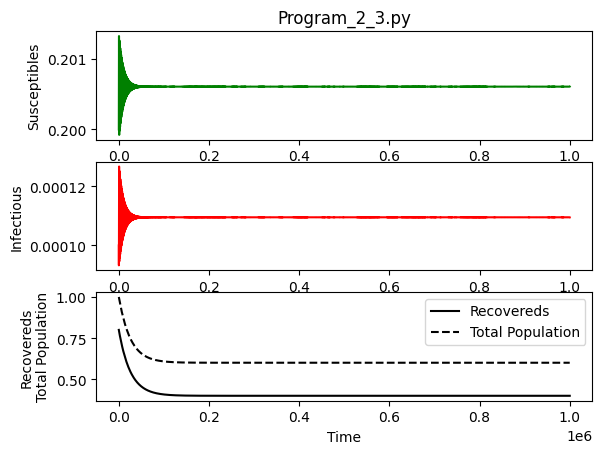

In [1]:
#!/usr/bin/env python

####################################################################
###    This is the PYTHON version of program 2.3 from page 35 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model with a probability of mortality, and	   #
### unequal births and deaths. This code assumes Density-          #
### Dependent Transmission        								   #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import scipy.integrate as spi
import numpy as np
import pylab as pl

rho = 0.5
nu = mu = 1 / (70 * 365.0)
beta = 520 / 365.0
gamma = 1 / 7.0
TS = 1.0
ND = 1e6
N0 = 1
X0 = 0.2
Y0 = 1e-4
Z0 = N0 - X0 - Y0
INPUT = (X0, Y0, Z0)


def diff_eqs(INP, t):
    """The main set of equations"""
    Y = np.zeros((3))
    V = INP
    Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
    Y[1] = beta * V[0] * V[1] - (gamma + mu) * V[1] / (1 - rho)
    Y[2] = gamma * V[1] - mu * V[2]
    return Y  # For odeint


t_start = 0.0
t_end = ND
t_inc = TS
t_range = np.arange(t_start, t_end + t_inc, t_inc)
RES = spi.odeint(diff_eqs, INPUT, t_range)

# Ploting
pl.subplot(311)
pl.plot(RES[:, 0], "-g", label="Susceptibles")
pl.title("Program_2_3.py")
pl.xlabel("Time")
pl.ylabel("Susceptibles")
pl.subplot(312)
pl.plot(RES[:, 1], "-r", label="Infectious")
pl.xlabel("Time")
pl.ylabel("Infectious")
pl.subplot(313)
pl.plot(RES[:, 2], "-k", label="Recovereds")
pl.plot(sum((RES[:, 0], RES[:, 1], RES[:, 2])), "--k", label="Total Population")
pl.xlabel("Time")
pl.legend(loc=0)
pl.ylabel("Recovereds\nTotal Population")
pl.show()

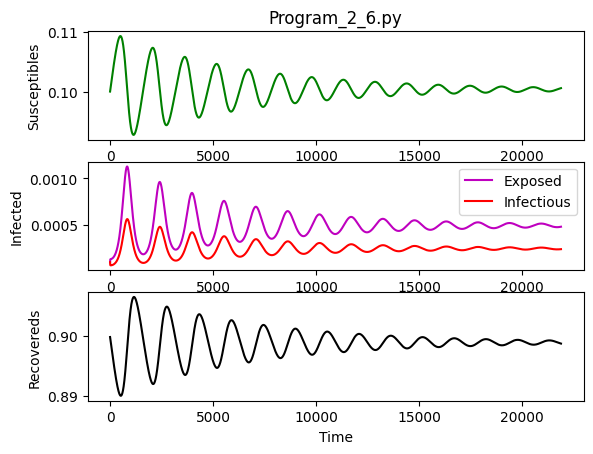

In [4]:
mu = 1 / (70 * 365.0)
beta = 520 / 365.0
sigma = 1 / 14.0
gamma = 1 / 7.0
ND = 60 * 365.0
TS = 1.0
S0 = 0.1
E0 = 1e-4
I0 = 1e-4
INPUT = (S0, E0, I0)


def diff_eqs(INP, t):
    """The main set of equations"""
    Y = np.zeros((3))
    V = INP
    Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
    Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
    Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2]
    return Y  # For odeint


t_start = 0.0
t_end = ND
t_inc = TS
t_range = np.arange(t_start, t_end + t_inc, t_inc)
RES = spi.odeint(diff_eqs, INPUT, t_range)

Rec = 1.0 - (RES[:, 0] + RES[:, 1] + RES[:, 2])

# Ploting
pl.subplot(311)
pl.plot(RES[:, 0], "-g", label="Susceptibles")
pl.title("Program_2_6.py")
pl.xlabel("Time")
pl.ylabel("Susceptibles")
pl.subplot(312)
pl.plot(RES[:, 1], "-m", label="Exposed")
pl.plot(RES[:, 2], "-r", label="Infectious")
pl.legend(loc=0)
pl.xlabel("Time")
pl.ylabel("Infected")
pl.subplot(313)
pl.plot(Rec, "-k", label="Recovereds")
pl.xlabel("Time")
pl.ylabel("Recovereds")
pl.show()

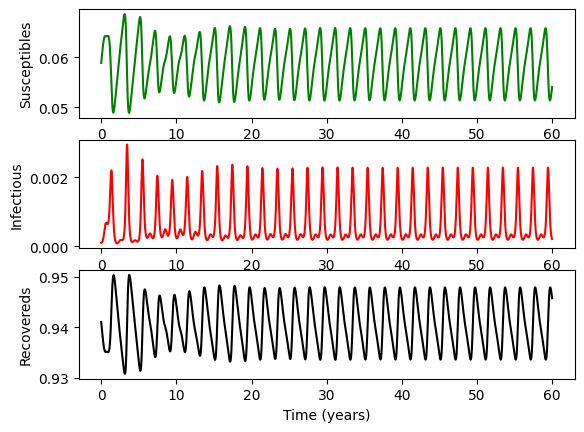

In [6]:
beta0 = 17 / 13.0
beta1 = [0.1]
gamma = 1 / 13.0
mu = 1 / (50 * 365.0)
S0 = 1 / 17.0
I0 = 1e-4
ND = MaxTime = 60 * 365.0
TS = 1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
# (beta0,beta1,gamma,mu,S0,I0,ND)=(17/13.,np.arange(0.001,0.251,0.001),1/13.,1./(50*365),1/17.,1e-4,20*365)

INPUT = np.array((S0, I0, 1 - S0 - I0))


def diff_eqs(INP, t):
    """The main set of equations"""
    Y = np.zeros((3))
    V = INP
    beta = beta0 * (1 + beta1 * np.sin(2 * np.pi * t / 365))
    Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
    Y[1] = beta * V[0] * V[1] - mu * V[1] - gamma * V[1]
    Y[2] = gamma * V[1] - mu * V[2]
    return Y  # For odeint


if len(beta1) == 1:
    beta1 = beta1[0]
    t_start = 0.0
    t_end = ND
    t_inc = TS
    t_range = np.arange(t_start, t_end + t_inc, t_inc)
    RES = spi.odeint(diff_eqs, INPUT, t_range)

    t = np.arange(ND) / 365.0
    # Ploting
    pl.subplot(311)
    pl.plot(t, RES[1:, 0], "g", label="S")
    pl.xlabel("Time (years)")
    pl.ylabel("Susceptibles")
    pl.subplot(312)
    pl.plot(t, RES[1:, 1], "r", label="I")
    pl.xlabel("Time (years)")
    pl.ylabel("Infectious")
    pl.subplot(313)
    pl.plot(t, 1 - (RES[1:, 0] + RES[1:, 1]), "k", label="R")
    pl.xlabel("Time (years)")
    pl.ylabel("Recovereds")

else:
    pl.ion()
    if ND < 3650:
        ND = 3650
    beta2 = beta1
    Bifur_I = np.zeros((len(beta2), 10))
    for i in range(len(beta2)):
        beta1 = beta2[i]

        t_start = 0.0
        t_end = ND
        t_inc = TS
        t_range = np.arange(t_start, t_end + t_inc, t_inc)
        RES = spi.odeint(diff_eqs, INPUT, t_range)
        INPUT = RES[-1]

        for j in range(10):
            Bifur_I[i, j] = RES[np.arange(ND)[((ND - j * 365.0) - 1)], 1]

        ### Producing the plot step by step but it is slow
        ### Prefer to make a video as shown in spatial models
    # 		if i > 1:
    # 			pl.semilogy (beta2, Bifur_I, '.k')
    # 			pl.xlabel (r'Seasonality, $\beta_1$')
    # 			pl.ylabel (r'Level of Infection')
    pl.ioff()
    pl.semilogy(beta2, (Bifur_I), ".k")
    ### if TeX commands do not work comment comment the next line
    pl.xlabel(r"Seasonality, $\beta_1$")
    pl.ylabel(r"Level of Infection")
    ### if TeX commands do not work comment uncomment the next line
# 	pl.xlabel ('Seasonality, beta1')
# 	pl.ylabel ('Level of Infection (log_10)')
pl.show()